In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid') #palette="pastel" 

import warnings
warnings.filterwarnings("ignore")

##### Part I. heatmap
###### seaborn gallary : https://seaborn.pydata.org/examples/heatmap_annotation.html

In [2]:
flights=sns.load_dataset('flights')
print(flights.info())
flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
fp = flights.pivot('month', 'year', 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


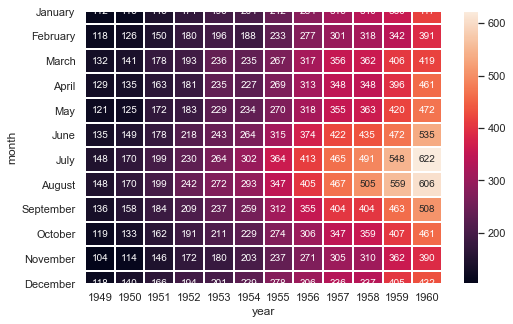

In [4]:
#### 만들어진 피봇테이블을 바탕으로 히트맵을 만든다. 
#### annot 옵션으로 숫자 표시여부, fmt 옵션으로 숫자의 타입(정수, 소수 등) 결정 
plt.figure(figsize=(8,5))
sns.heatmap(data=fp, annot=True,fmt='d', linewidths = 1)

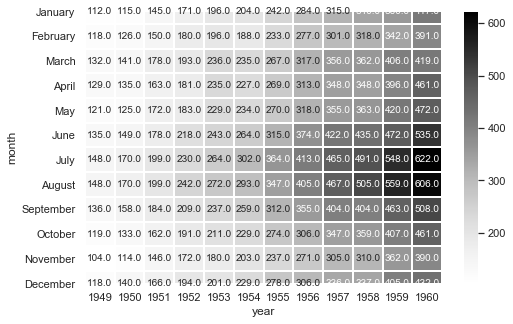

In [5]:
#### fmt 옵션에서 소수점 지정하기 : fmt = '.nf'
#### cmap을 Blues, Reds, Purples, Greens, Greys, vlag, ocean 등으로 지정할 수 있다. (default는 rocket)
plt.figure(figsize=(8,5))
sns.heatmap(data=fp, annot=True,fmt='.1f', linewidths = 1, cmap='Greys')

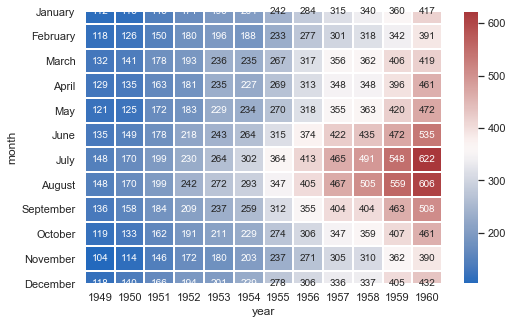

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(data=fp, annot=True,fmt='.0f', linewidths = 1, cmap='vlag')

##### Part II. 상관계수와 heatmap
###### seaborn gallary : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [7]:
from string import ascii_letters

data= np.random.normal(size=(100,26))    #### 100 x 26개의 랜덤값 생성 
columns = list(ascii_letters[0:26])      #### a ~ z의 26개 알파벳 문자 생성 
print(data)
print('---------------------------------------------------------------------------')
print(columns)

[[-1.68345163  0.11842233 -0.48705004 ... -1.76815333  1.69349486
   0.09705772]
 [ 1.10224539  0.23397949  0.33336886 ...  0.95611705  1.19089874
  -0.45133155]
 [-0.47801794 -2.47395046 -1.50293014 ...  0.10614639 -0.93168691
  -0.13995188]
 ...
 [-1.28052299  1.96743549  1.11576042 ... -0.91362415 -1.96210585
   0.59969557]
 [-0.47950489  0.69875561  2.15876706 ...  0.42080848 -0.23878056
   0.96935773]
 [ 0.17421609 -0.01819664  0.32627457 ... -0.78249826  0.59497594
   1.18190339]]
---------------------------------------------------------------------------
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [8]:
d=pd.DataFrame(data=data, columns=columns)
print(d.shape)
d.head()

(100, 26)


,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,-1.683452,0.118422,-0.487050,0.108190,-0.171364,1.373083,0.036544,-1.172923,0.399127,-1.707833,...,0.881180,0.086575,-0.220529,-1.055002,-1.649843,-1.618975,1.275369,-1.768153,1.693495,0.097058
1,1.102245,0.233979,0.333369,1.051519,-1.542162,-0.557571,-1.518053,-0.530987,1.078433,-0.252111,...,-0.144383,-1.132105,-1.671183,1.393837,0.407345,-0.951392,-0.119009,0.956117,1.190899,-0.451332
2,-0.478018,-2.473950,-1.502930,1.587251,0.706434,-0.196975,-1.321576,-0.605100,1.015923,-0.026833,...,-0.607430,2.721994,-0.216193,-0.199824,-1.038892,0.042726,-0.059838,0.106146,-0.931687,-0.139952
3,-0.912165,-1.070895,-0.264696,0.142801,1.548725,-0.285961,-0.736627,0.698725,-1.464392,-0.908446,...,-0.512072,-0.701054,0.971200,0.455431,-0.859418,0.220219,0.094789,0.919013,0.039316,0.543832
4,-0.295150,0.197212,0.951769,-0.056626,0.198639,0.515792,0.193813,0.069749,-0.831872,-1.385519,...,-0.764399,2.267669,0.028022,0.303165,-0.015433,-1.165324,-1.556005,0.738515,1.246611,-0.402503


In [9]:
#### correlation matrix 생성 
corr = d.corr()
corr.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,1.000000,-0.044196,-0.045905,0.061942,0.110002,-0.075273,-0.000729,0.231037,-0.081265,0.038014,...,-0.024740,0.064916,-0.162069,0.116546,0.079808,0.007701,-0.077238,-0.011386,-0.080115,-0.032324
b,-0.044196,1.000000,0.241010,-0.073273,0.019857,0.008914,0.121618,0.199222,-0.089646,-0.095451,...,-0.114094,-0.173025,0.059550,-0.041847,0.072983,-0.199534,0.054003,0.008573,0.030719,0.068015
c,-0.045905,0.241010,1.000000,-0.020808,-0.016339,0.052676,-0.052757,-0.005865,-0.206395,-0.135681,...,-0.050524,0.015036,0.060187,-0.100749,0.045249,-0.095045,0.220812,-0.070384,-0.040408,-0.033824
d,0.061942,-0.073273,-0.020808,1.000000,0.029916,-0.029224,0.068740,0.199417,0.036046,-0.020958,...,0.053761,0.061269,-0.045854,0.027316,-0.003244,0.035944,0.096170,0.191246,-0.174687,-0.030201
e,0.110002,0.019857,-0.016339,0.029916,1.000000,-0.053891,0.070086,0.094897,-0.037551,0.061130,...,-0.096416,-0.085490,0.106642,0.027562,-0.087718,-0.121978,0.133879,-0.060039,-0.217373,0.010210


In [12]:
## mask 옵션에 사용하기 위해, mask의 속성을 생성한다. 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

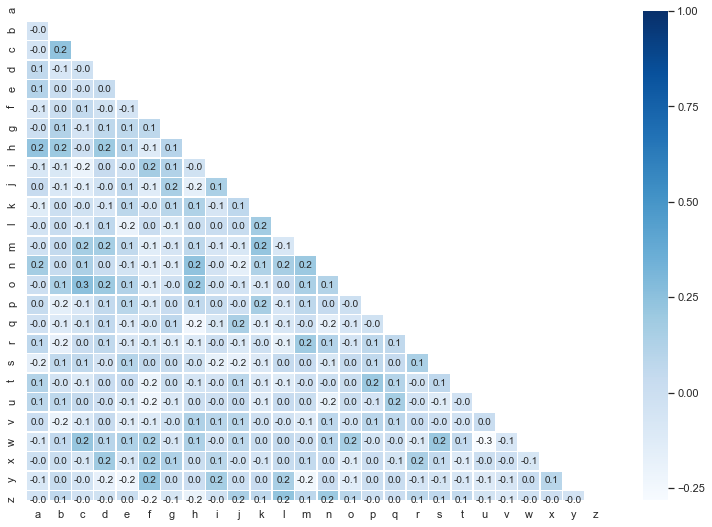

In [13]:
#### mask 옵션으로 중복되는 절반을 없앤다. 
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True,fmt='.1f', linewidths = 0.5, cmap='Blues', mask=mask)

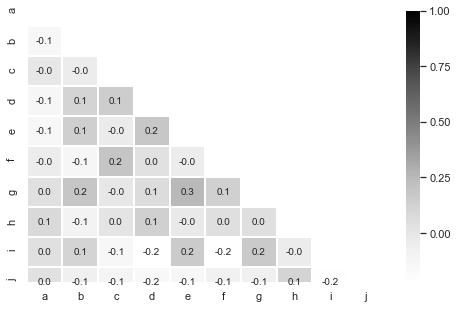

In [14]:
#### practice
data2= np.random.normal(size=(100,10))     
columns2 = list(ascii_letters[0:10])       
d2=pd.DataFrame(data=data2, columns=columns2)
corr2 = d2.corr()
mask2 = np.triu(np.ones_like(corr2, dtype=np.bool))

plt.figure(figsize=(8,5))
sns.heatmap(data=corr2, annot=True,fmt='.1f', linewidths = 1, cmap='Greys', mask=mask2)

In [15]:
## practice 2 
mpg = sns.load_dataset('mpg') 
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
m_mpg = mpg.corr()
m_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


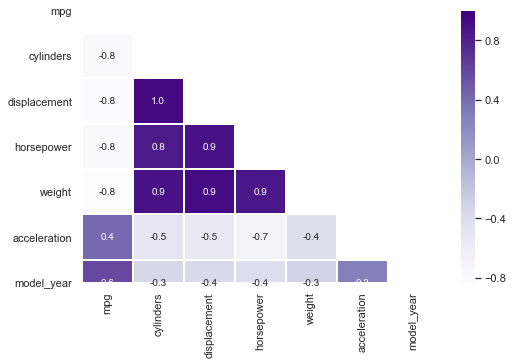

In [35]:
mask3 = np.triu(np.ones_like(m_mpg, dtype=np.bool))

plt.figure(figsize=(8,5))
sns.heatmap(data=m_mpg, annot=True, fmt='.1f', linewidths = 1, cmap='Purples', mask=mask3)

##### Part III. pairplot
###### seaborn gallary : https://seaborn.pydata.org/examples/scatterplot_matrix.html

In [37]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


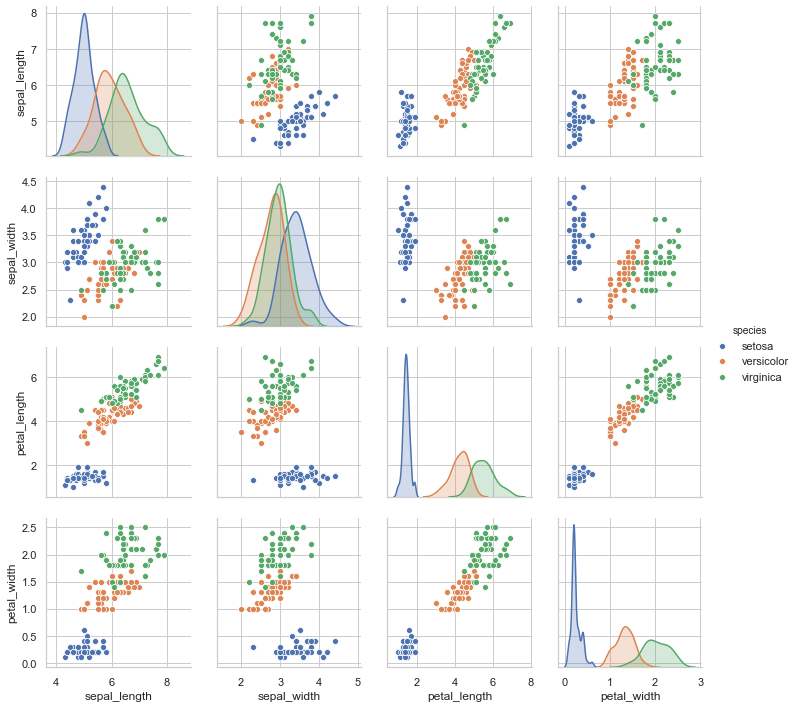

In [41]:
#### pairplot으로 correlation matrix를 한번에 시각화 
sns.pairplot(data=iris, hue = 'species')

In [43]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


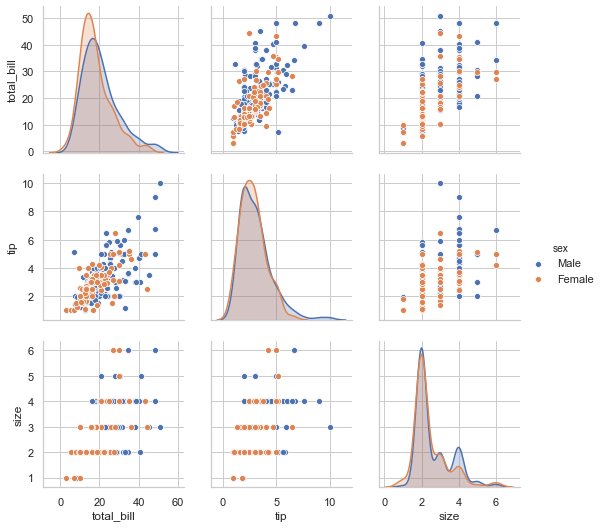

In [45]:
sns.pairplot(data=tips, hue='sex')

In [46]:
mpg = sns.load_dataset('mpg')
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [49]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [51]:
#### 결측치가 있는 horsepower와 분석에 불필요한 name 컬럼을 제외하자 
mpg.drop(['horsepower', 'name'], axis=1)

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,8,307.0,3504,12.0,70,usa
1,15.0,8,350.0,3693,11.5,70,usa
2,18.0,8,318.0,3436,11.0,70,usa
3,16.0,8,304.0,3433,12.0,70,usa
4,17.0,8,302.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,usa
394,44.0,4,97.0,2130,24.6,82,europe
395,32.0,4,135.0,2295,11.6,82,usa
396,28.0,4,120.0,2625,18.6,82,usa


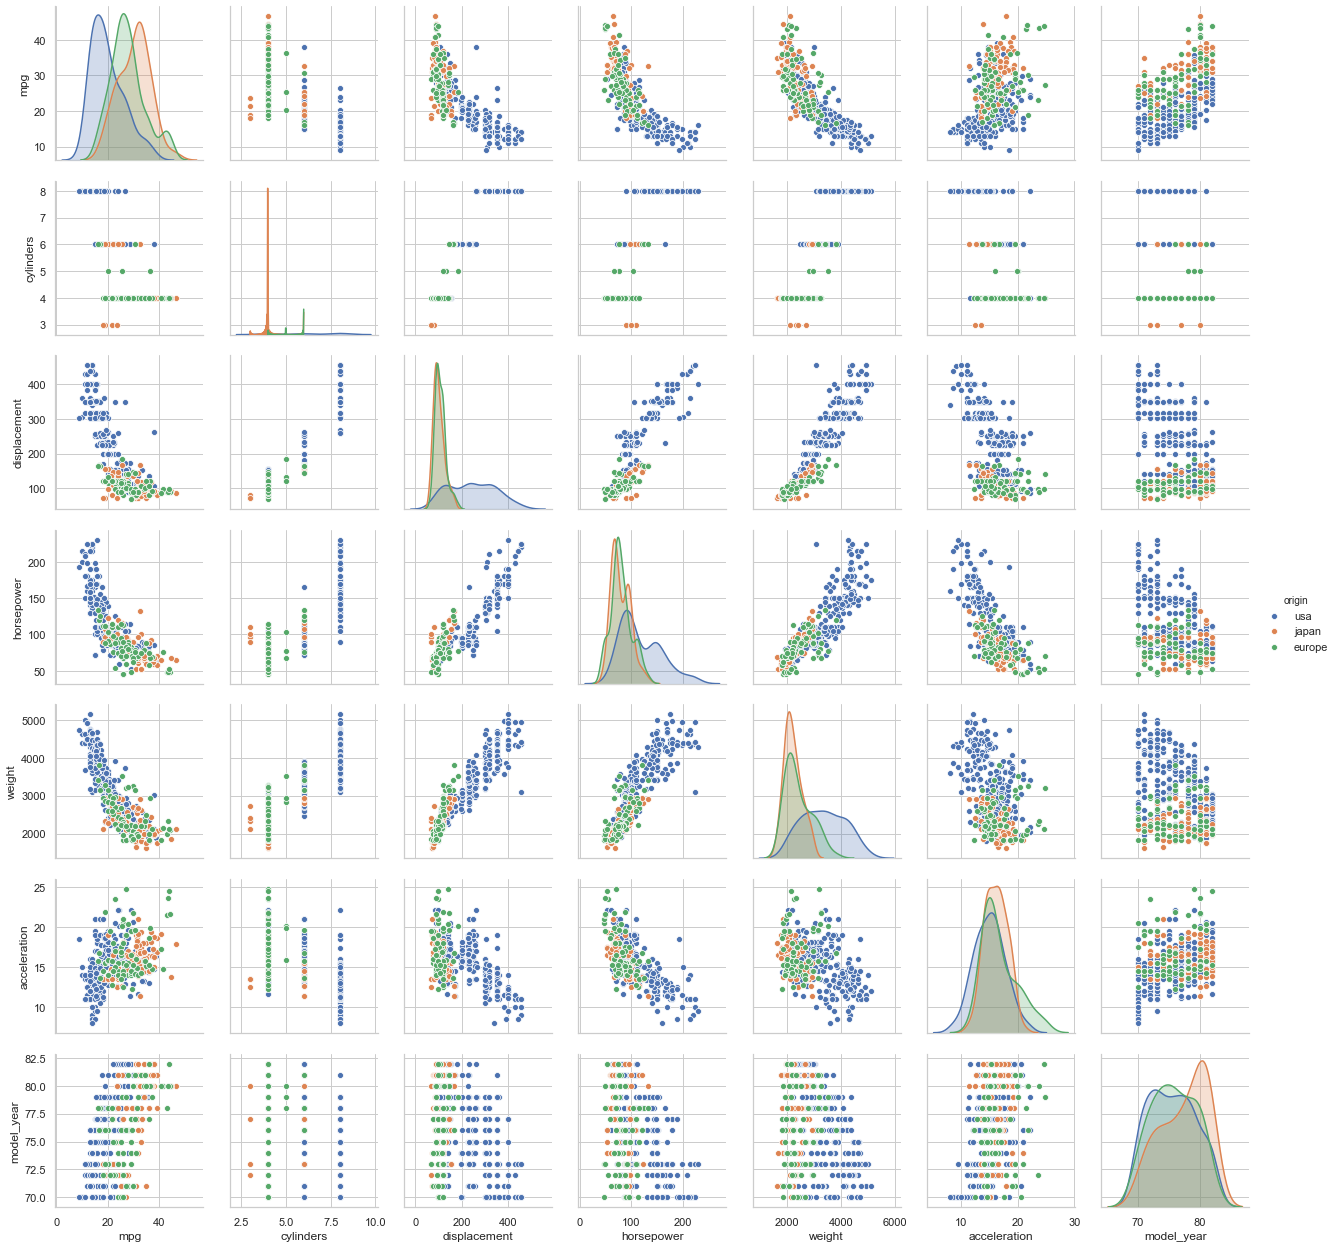

In [52]:
sns.pairplot(data=mpg, hue = 'origin')

In [56]:
mpg_c = mpg.corr()
mpg_c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


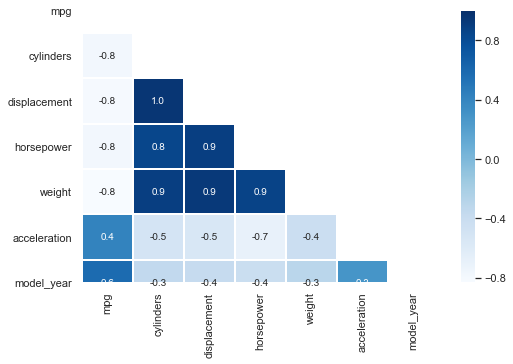

In [57]:
mask_mpg = np.triu(np.ones_like(mpg_c, dtype=np.bool))
plt.figure(figsize=(8,5))
sns.heatmap(data=mpg_c, annot=True,fmt='.1f', linewidths = 1, cmap='Blues', mask=mask_mpg)

##### Part IV. multi kdeplot
###### seaborn gallary : https://seaborn.pydata.org/examples/multiple_joint_kde.html

In [61]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
#### pandas의 query 명령어 활용하여, 품종별로 데이터셋을 구분  
iris_setosa = iris.query("species == 'setosa'")
iris_versicolor = iris.query("species == 'versicolor'")
iris_virginica = iris.query("species == 'virginica'")

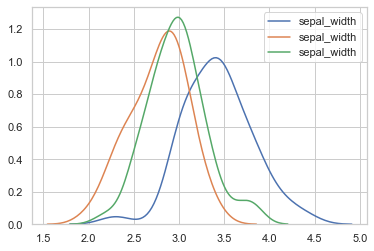

In [75]:
#### kde plot에서 단변량을 표현 할 때 
sns.kdeplot(iris_setosa['sepal_width'])
sns.kdeplot(iris_versicolor['sepal_width'])
sns.kdeplot(iris_virginica['sepal_width'])

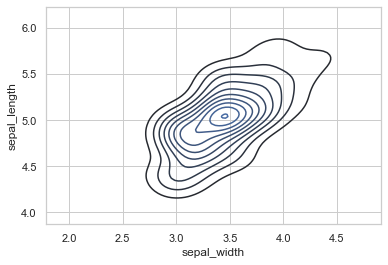

In [85]:
#### kde plot에서 변수를 두개 지정하면 밀도함수 그래프가 그려진다. 
sns.kdeplot(iris_setosa['sepal_width'], iris_setosa['sepal_length'])

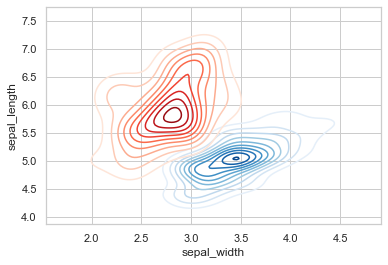

In [86]:
#### 여러개를 한 화면에 표시하기 
sns.kdeplot(iris_setosa['sepal_width'], iris_setosa['sepal_length'], cmap='Blues')
sns.kdeplot(iris_versicolor['sepal_width'], iris_versicolor['sepal_length'], cmap='Reds')
#sns.kdeplot(iris_virginica['sepal_width'], iris_virginica['sepal_length'], cmap='Purples')